In [2]:
import pandas as pd
pd.options.display.float_format = '{:,.4f}'.format
pd.options.display.max_rows = 10000
pd.options.display.max_columns = 100
from datetime import datetime 
import numpy as np
import os, random, math, time
from tqdm import tqdm
from copy import deepcopy
from collections import Counter

# Visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
plt.rcParams['font.family'] = 'NanumGothic'
import platform
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
    rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('starbucks.xlsx')
df.head()

Unnamed: 0            event  time  offer_id  gender  age  income  \
0           0   offer received     0         6       0   75  100000   
1           1     offer viewed     6         6       0   75  100000   
2           2  offer completed   132         6       0   75  100000   
3           3   offer received   168         5       0   75  100000   
4           4     offer viewed   216         5       0   75  100000   

   member_year  member_month  member_day  members_since_in_days  \
0         2017             5           9                   1646   
1         2017             5           9                   1646   
2         2017             5           9                   1646   
3         2017             5           9                   1646   
4         2017             5           9                   1646   

   member_since_year  reward  difficulty  duration  offer_type  email  web  \
0                  4       5           5         7           0      1    1   
1                  4       5           5         7           0      1    1   
2                  4       5           5         7           0      1    1   
3                  4       0           0         3           2      1    0   
4                  4       0           0         3           2      1    0   

   mobile  social  customer_ids  
0       1       0             1  
1       1       0             1  
2       1       0             1  
3       1       1             1  
4       1       1             1

In [4]:
df.shape

(148805, 21)

In [5]:
df.isna().sum()

Unnamed: 0               0
event                    0
time                     0
offer_id                 0
gender                   0
age                      0
income                   0
member_year              0
member_month             0
member_day               0
members_since_in_days    0
member_since_year        0
reward                   0
difficulty               0
duration                 0
offer_type               0
email                    0
web                      0
mobile                   0
social                   0
customer_ids             0
dtype: int64

* event (str) - record description (ie offer completed, offer received, offer viewed, etc.) 
* time (int) - time in hours since start of test. The data begins at time t=0
* offer_id (int) - 10 different IDs
* gender (int) – F:0, M:1, Other:2
* age (int) - age of the customer
* income (float) - customer's income
* member_year (int) - year when customer created an app account\
* reward (int) - reward given for completing an offer
* difficulty (int) - minimum required spend to complete an offer
* duration (int) - time for offer to be open, in days
* offer_type (int) - type of offer ie 0:BOGO, 1:discount, 2:informational, 
* types of channel (email, web, mobile, social)
* customer id

In [6]:
df[df.offer_type == 2]['event'].unique()

array(['offer received', 'offer viewed'], dtype=object)

In [7]:
df = df[df.offer_type !=2 ].reset_index(drop=True)

In [8]:
df.shape

(126145, 21)

In [9]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [10]:
df = df.drop_duplicates(keep='first').reset_index(drop = True)

In [11]:
df.shape

(125771, 20)

In [12]:
df.columns

Index(['event', 'time', 'offer_id', 'gender', 'age', 'income', 'member_year',
       'member_month', 'member_day', 'members_since_in_days',
       'member_since_year', 'reward', 'difficulty', 'duration', 'offer_type',
       'email', 'web', 'mobile', 'social', 'customer_ids'],
      dtype='object')

In [12]:
df = pd.get_dummies(df, columns=['event'], drop_first=False)

In [13]:
df = df.groupby(['offer_id', 'gender', 'age', 'income', 'member_year',
       'member_month', 'member_day', 'members_since_in_days',
       'member_since_year', 'reward', 'difficulty', 'duration', 'offer_type',
       'email', 'web', 'mobile', 'social', 'customer_ids']).max().reset_index()

In [14]:
df.head()

offer_id  gender  age  income  member_year  member_month  member_day  \
0         0       0   18   31000         2017             9          11   
1         0       0   18   43000         2015            10          25   
2         0       0   18   49000         2017             5          24   
3         0       0   18   53000         2013            10           7   
4         0       0   18   73000         2017             2          23   

   members_since_in_days  member_since_year  reward  difficulty  duration  \
0                   1521                  4       5          20        10   
1                   2208                  6       5          20        10   
2                   1631                  4       5          20        10   
3                   2956                  8       5          20        10   
4                   1721                  4       5          20        10   

   offer_type  email  web  mobile  social  customer_ids  time  \
0           1      1    1       0       0         10090   156   
1           1      1    1       0       0          4443   360   
2           1      1    1       0       0            94   168   
3           1      1    1       0       0         11706   558   
4           1      1    1       0       0         13414   612   

   event_offer completed  event_offer received  event_offer viewed  
0                      0                     1                   1  
1                      1                     1                   0  
2                      0                     1                   0  
3                      1                     1                   0  
4                      1                     1                   0

In [15]:
df.shape

(44181, 22)

In [16]:
df.columns

Index(['offer_id', 'gender', 'age', 'income', 'member_year', 'member_month',
       'member_day', 'members_since_in_days', 'member_since_year', 'reward',
       'difficulty', 'duration', 'offer_type', 'email', 'web', 'mobile',
       'social', 'customer_ids', 'time', 'event_offer completed',
       'event_offer received', 'event_offer viewed'],
      dtype='object')

In [15]:
import pandas_profiling
pr=df.profile_report()

In [16]:
pr

Summarize dataset:   0%|          | 0/35 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
df[['reward', 'difficulty']][df.reward==df.difficulty].shape

(22062, 2)

In [74]:
df['event_offer completed'].value_counts()

1    27942
0    16239
Name: event_offer completed, dtype: int64

In [75]:
27942/16239

1.7206724552004433

In [18]:
df[(df.reward==df.difficulty)]['offer_type'].unique()

array([0])

In [23]:
df['reward_rt'] = df.reward/df.difficulty

In [20]:
df.offer_type.unique()

array([1, 0])

In [21]:
df = df.drop(['email', 'event_offer received', 'event_offer viewed', 
              'customer_ids','time', 'member_since_year'], axis = 1)

In [22]:
df.columns

Index(['offer_id', 'gender', 'age', 'income', 'member_year', 'member_month',
       'member_day', 'members_since_in_days', 'reward', 'difficulty',
       'duration', 'offer_type', 'web', 'mobile', 'social',
       'event_offer completed', 'reward_rt'],
      dtype='object')

In [24]:
df.shape

(44181, 17)

In [25]:
fl_col = ['age', 'income','member_month','member_day', 'members_since_in_days']

In [26]:
int_col = ['offer_id', 'gender','reward','difficulty', 'duration','offer_type','web', 'mobile', 'social',
       'event_offer completed','reward_rt', 'member_year', ]

In [28]:
df_info = deepcopy(df)

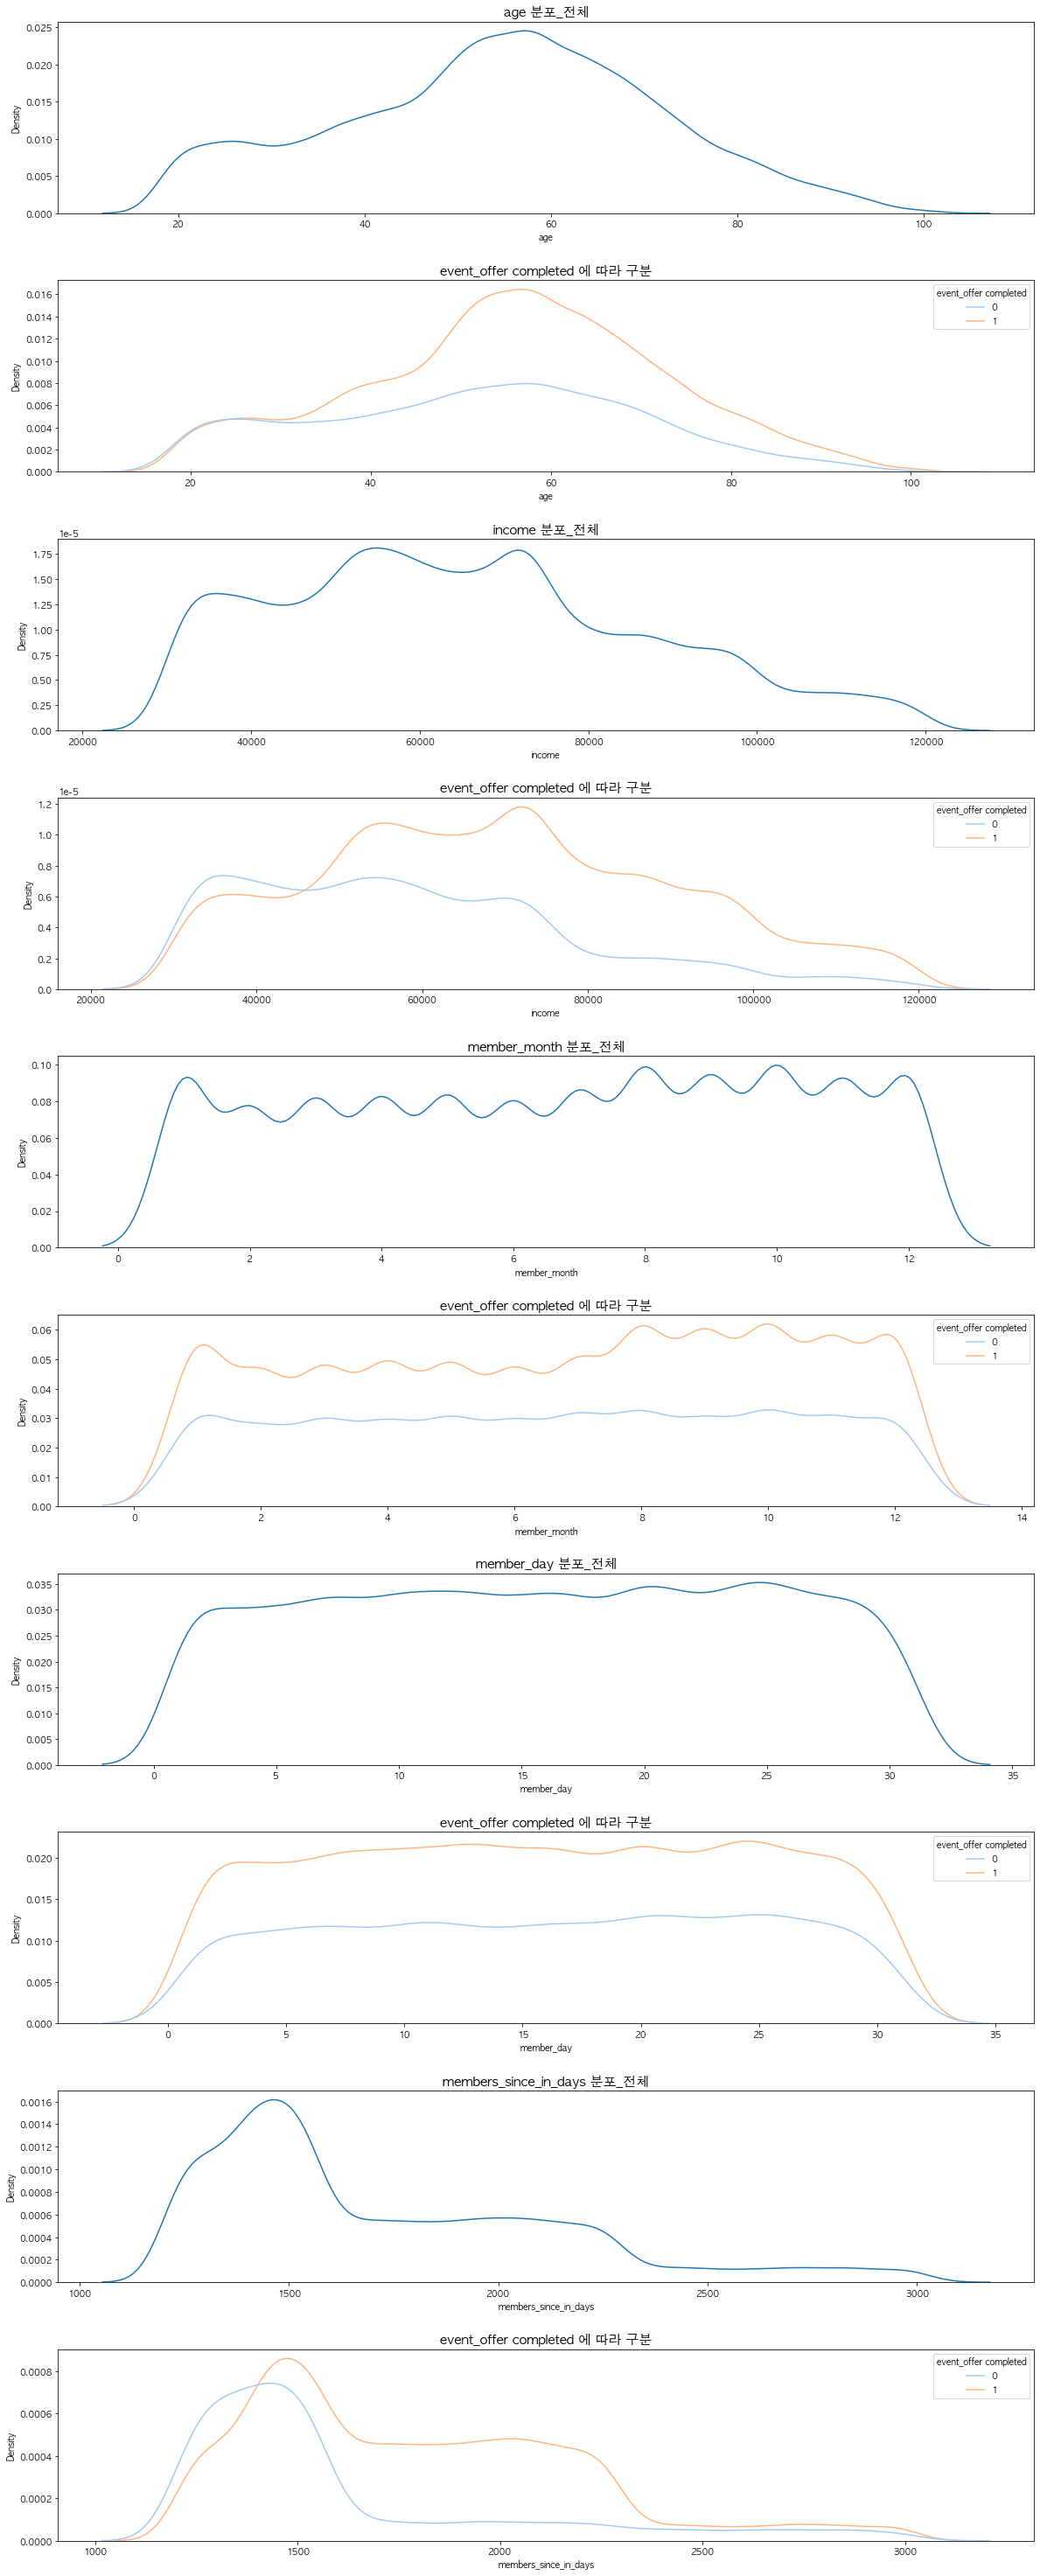

In [29]:
n = len(fl_col)
fig,ax = plt.subplots(n*2,1,figsize=(20,5*n*2))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)
for ind, i in enumerate(fl_col): 
    a_ = 'event_offer completed'
    sns.kdeplot(df_info[i], ax=ax[ind*2])
    ax[ind*2].set_title("{} 분포_전체".format(i), fontsize = 15)
    sns.kdeplot(df_info[i], palette = "pastel", ax=ax[ind*2+1], hue = df_info[a_])
    ax[ind*2+1].set_title("{} 에 따라 구분".format(a_), fontsize = 15)

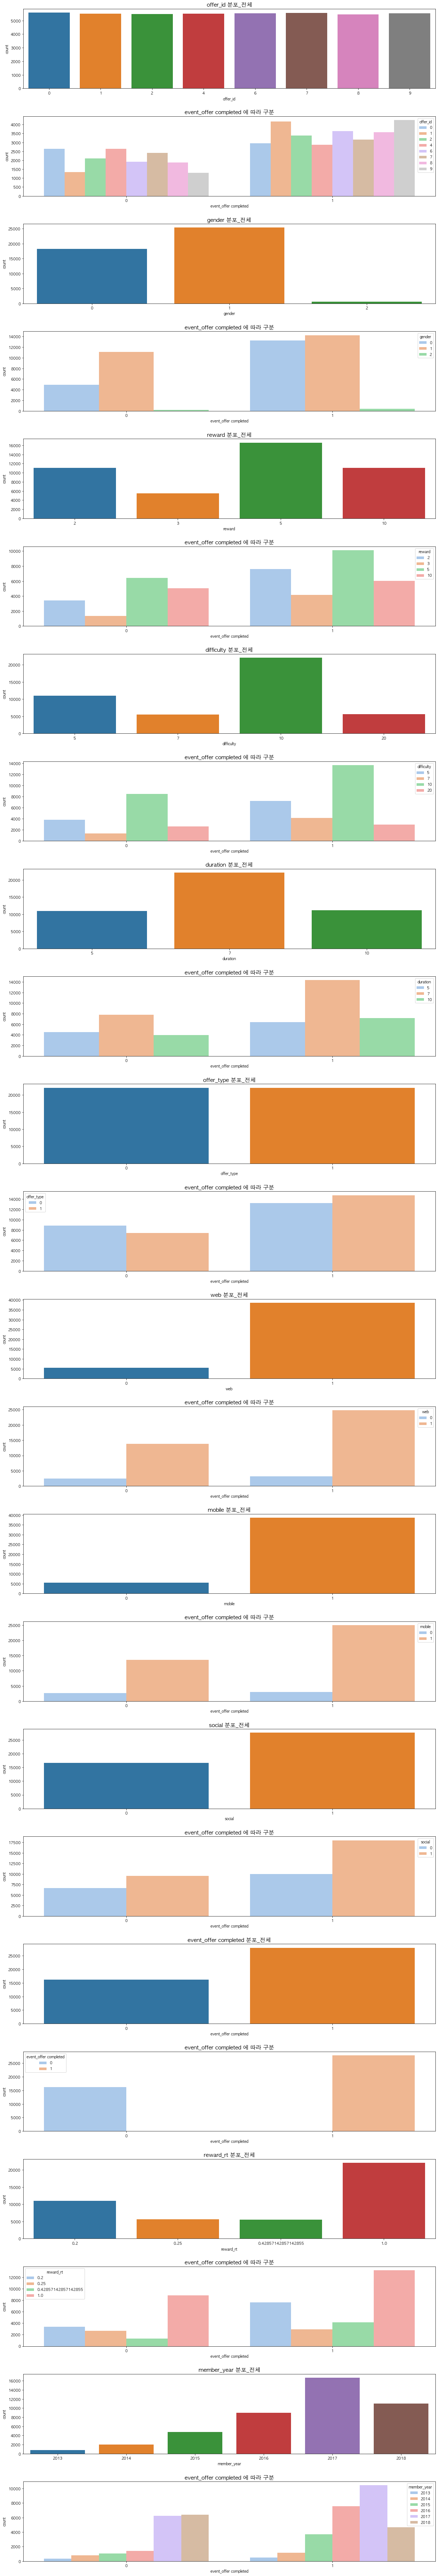

In [30]:
n = len(int_col)
fig,ax = plt.subplots(n*2,1,figsize=(20,5*n*2))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)
for ind, i in enumerate(int_col): 
    sns.countplot(df_info[i], ax=ax[ind*2])
    ax[ind*2].set_title("{} 분포_전체".format(i), fontsize = 15)
    sns.countplot(df_info[a_], palette = "pastel", ax=ax[ind*2+1], hue = df_info[i])
    ax[ind*2+1].set_title("{} 에 따라 구분".format(a_), fontsize = 15)

In [32]:
df.columns

Index(['offer_id', 'gender', 'age', 'income', 'member_year', 'member_month',
       'member_day', 'members_since_in_days', 'reward', 'difficulty',
       'duration', 'offer_type', 'web', 'mobile', 'social',
       'event_offer completed', 'reward_rt'],
      dtype='object')

In [34]:
cat_col = ['offer_id', 'gender']

for i in cat_col:
    df[i] = df[i].astype('object')
   
df1 = pd.get_dummies(df, columns=cat_col, drop_first=True)
df2 = deepcopy(df)

In [35]:
df.dtypes

offer_id                  object
gender                    object
age                        int64
income                     int64
member_year                int64
member_month               int64
member_day                 int64
members_since_in_days      int64
reward                     int64
difficulty                 int64
duration                   int64
offer_type                 int64
web                        int64
mobile                     int64
social                     int64
event_offer completed      uint8
reward_rt                float64
dtype: object

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [37]:
y1 = deepcopy(df1['event_offer completed'])
X1 = deepcopy(df1.drop(['event_offer completed'], axis = 1))

y2 = deepcopy(df2['event_offer completed'])
X2 = deepcopy(df2.drop(['event_offer completed'], axis = 1))

In [38]:
X_tr1, X_tst1, y_tr1, y_tst1 = train_test_split(X1, y1, test_size=0.25, stratify = y1, random_state=2021)
X_tr2, X_tst2, y_tr2, y_tst2 = train_test_split(X2, y2, test_size=0.25, stratify = y2, random_state=2021)

In [39]:
skf = StratifiedKFold(n_splits=3)

model_list = [DecisionTreeClassifier(random_state = 2021), 
              RandomForestClassifier(random_state = 2021), 
              GradientBoostingClassifier(random_state = 2021), 
              CatBoostClassifier(random_state = 2021, verbose = False), 
              XGBClassifier(random_state=2021, eval_metric='mlogloss')]

model_dic = {}

In [40]:
for mnd, model in enumerate(model_list):
    print(f'model{mnd}', model)
    acc_list = []
    
    for train_index, test_index in skf.split(X_tr1, y_tr1):
        X_train, X_test = X_tr1.iloc[train_index], X_tr1.iloc[test_index]
        y_train, y_test = y_tr1.iloc[train_index], y_tr1.iloc[test_index]
        
        clf = model.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        acc_list.append(accuracy_score(y_test,y_pred))
        
    model_dic[f'model{mnd}'] = np.mean(acc_list)        

model0 DecisionTreeClassifier(random_state=2021)
model1 RandomForestClassifier(random_state=2021)
model2 GradientBoostingClassifier(random_state=2021)
model3 <catboost.core.CatBoostClassifier object at 0x7fc404d737c0>
model4 XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, eval_metric='mlogloss', gamma=None,
              gpu_id=None, importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=2021, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)


In [41]:
model5 = CatBoostClassifier(random_state = 2021, cat_features = cat_col, verbose = False)

acc_list = []
for train_index, test_index in skf.split(X_tr2, y_tr2):
    X_train, X_test = X_tr2.iloc[train_index], X_tr2.iloc[test_index]
    y_train, y_test = y_tr2.iloc[train_index], y_tr2.iloc[test_index]
        
    clf = model5.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    acc_list.append(accuracy_score(y_test,y_pred))
        
model_dic['model5'] = np.mean(acc_list)        

In [42]:
sorted(model_dic.items(), key=lambda x: x[1], reverse = True)

[('model3', 0.7307680700165987),
 ('model4', 0.7307680700165987),
 ('model5', 0.7303455560585483),
 ('model2', 0.7286555002263467),
 ('model1', 0.7035460992907803),
 ('model0', 0.6574618982948545)]

In [43]:
base_model = CatBoostClassifier(random_state = 2021, cat_features = cat_col, verbose = False)

In [44]:
params = {'iterations': [500, 750, 1000],
          'learning_rate': [0.025, 0.05, 0.75],  
          'depth': [6, 8, 10],
          'eval_metric': ['Accuracy']}

In [45]:
grid_model = GridSearchCV(base_model, param_grid=params, cv=3, verbose = 2)

grid_model.fit(X_tr2, y_tr2)

print(grid_model.best_estimator_)
print(grid_model.best_score_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END depth=6, eval_metric=Accuracy, iterations=500, learning_rate=0.025; total time=   4.2s
[CV] END depth=6, eval_metric=Accuracy, iterations=500, learning_rate=0.025; total time=   4.2s
[CV] END depth=6, eval_metric=Accuracy, iterations=500, learning_rate=0.025; total time=   4.2s
[CV] END depth=6, eval_metric=Accuracy, iterations=500, learning_rate=0.05; total time=   4.3s
[CV] END depth=6, eval_metric=Accuracy, iterations=500, learning_rate=0.05; total time=   4.4s
[CV] END depth=6, eval_metric=Accuracy, iterations=500, learning_rate=0.05; total time=   4.3s
[CV] END depth=6, eval_metric=Accuracy, iterations=500, learning_rate=0.75; total time=   4.6s
[CV] END depth=6, eval_metric=Accuracy, iterations=500, learning_rate=0.75; total time=   4.5s
[CV] END depth=6, eval_metric=Accuracy, iterations=500, learning_rate=0.75; total time=   4.5s
[CV] END depth=6, eval_metric=Accuracy, iterations=750, learning_rate=0.025; tota

In [46]:
print(grid_model.best_params_)

{'depth': 6, 'eval_metric': 'Accuracy', 'iterations': 500, 'learning_rate': 0.05}


In [47]:
tunned_model = CatBoostClassifier(random_state = 2021, cat_features = cat_col, verbose = False, 
                                  depth=6, eval_metric='Accuracy', 
                                  iterations=500, learning_rate=0.05)

tunned_model.fit(X_tr2, y_tr2)

y_pred_t = tunned_model.predict(X_tst2)

accuracy_score(y_tst2,y_pred_t)

0.7420785804816223

In [48]:
base_model.fit(X_tr2, y_tr2)

y_pred_b = base_model.predict(X_tst2)

accuracy_score(y_tst2,y_pred_b)

0.743979721166033

In [68]:
# base_model.get_all_params()

In [49]:
from sklearn.metrics import confusion_matrix

In [64]:
confusion_matrix(y_tst2, y_pred_t)

array([[2375, 1685],
       [1164, 5822]])

In [51]:
confusion_matrix(y_tst2, y_pred_b)

array([[2377, 1683],
       [1145, 5841]])

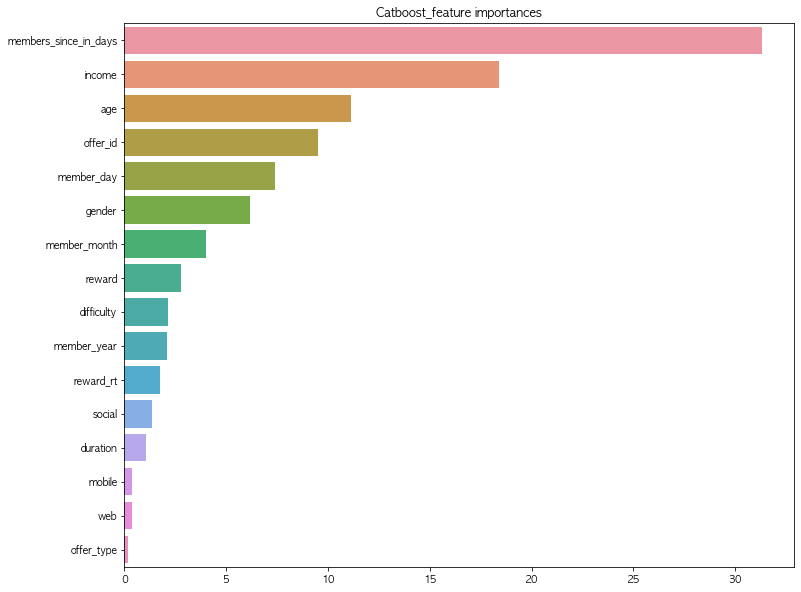

In [52]:
ft_importances = pd.Series(base_model.feature_importances_, index = X_tst2.columns)
ft_importances = ft_importances.sort_values(ascending=False)
plt.figure(figsize=(12, 10))
plt.title("Catboost_feature importances")
sns.barplot(x=ft_importances, y = ft_importances.index)
plt.show()

In [53]:
ft_importances.shape

(16,)

In [59]:
ft_col = ft_importances[:13].index
ft_col = ft_col.to_list()

In [69]:
base_model.fit(X_tr2[ft_col], y_tr2)

y_pred_b2 = base_model.predict(X_tst2[ft_col])

print(accuracy_score(y_tst2,y_pred_b2))

confusion_matrix(y_tst2, y_pred_b2)

0.7462429838855694


array([[2383, 1677],
       [1126, 5860]])

In [77]:
pd.crosstab(y_tst2, y_pred_b2, rownames=['Actual Class'], colnames=['Predicted Class'])

Predicted Class     0     1
Actual Class               
0                2383  1677
1                1126  5860

In [71]:
y_tst2.value_counts()

1    6986
0    4060
Name: event_offer completed, dtype: int64

In [78]:
ft_col

['members_since_in_days',
 'income',
 'age',
 'offer_id',
 'member_day',
 'gender',
 'member_month',
 'reward',
 'difficulty',
 'member_year',
 'reward_rt',
 'social',
 'duration']

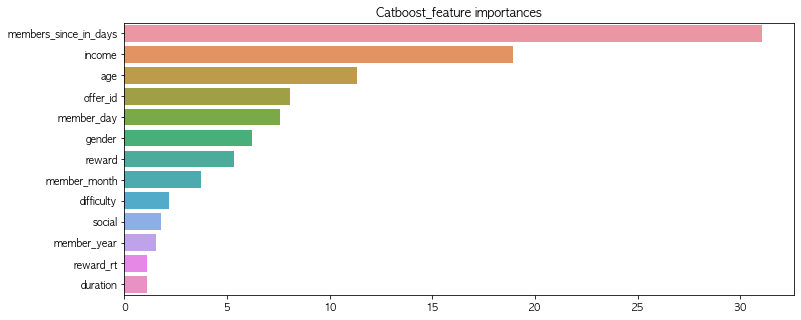

In [87]:
ft_importances2 = pd.Series(base_model.feature_importances_, index = ft_col)
ft_importances2 = ft_importances2.sort_values(ascending=False)

plt.figure(figsize=(12, 5))
plt.title("Catboost_feature importances")
sns.barplot(x=ft_importances2, y = ft_importances2.index)
plt.show()

In [79]:
import shap

In [80]:
X_train_selected = X_tr2[ft_col].reset_index(drop=True)
X_test_selected = X_tst2[ft_col].reset_index(drop=True)
X_train_selected.columns

Index(['members_since_in_days', 'income', 'age', 'offer_id', 'member_day',
       'gender', 'member_month', 'reward', 'difficulty', 'member_year',
       'reward_rt', 'social', 'duration'],
      dtype='object')

In [81]:
f_model = CatBoostClassifier(random_state = 2021, cat_features = cat_col, verbose = False)
f_model.fit(X_train_selected, y_tr2)

In [82]:
explainer = shap.TreeExplainer(f_model)
shap_values = explainer.shap_values(X_train_selected)

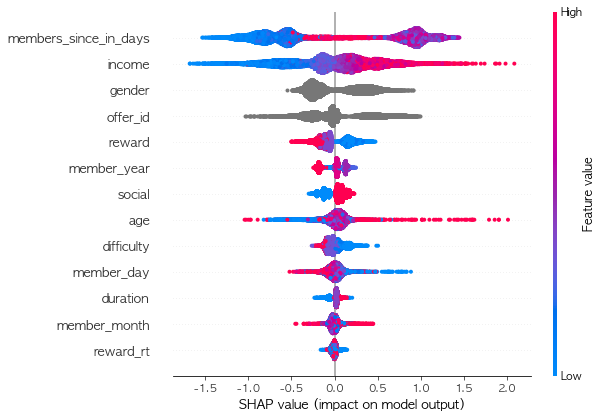

In [83]:
shap.summary_plot(shap_values, X_train_selected)

In [84]:
shap.initjs()

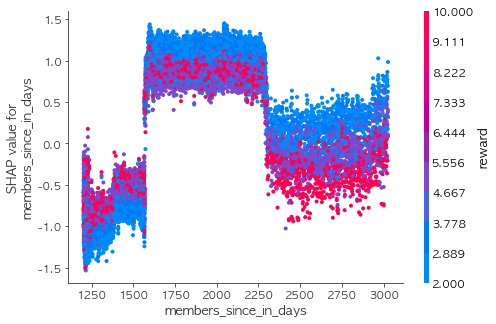

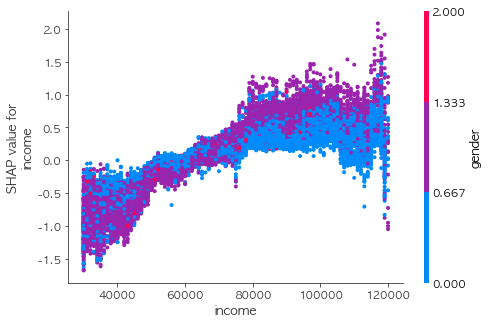

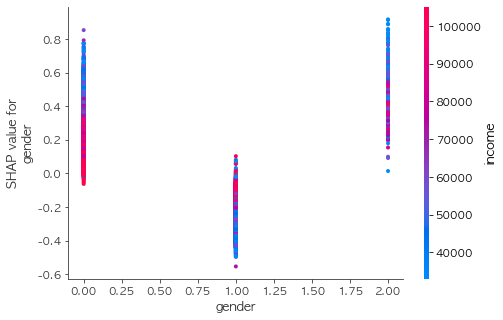

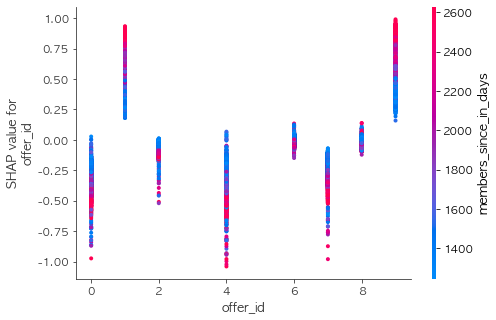

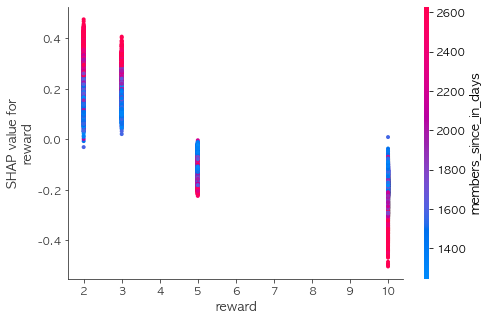

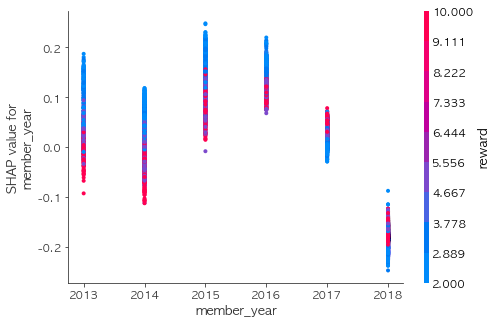

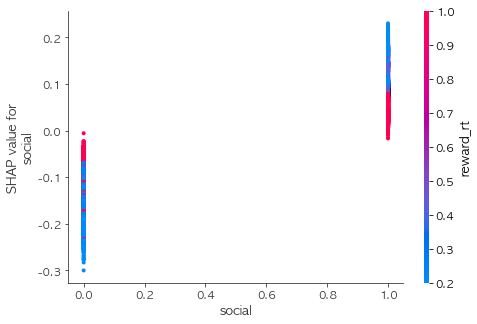

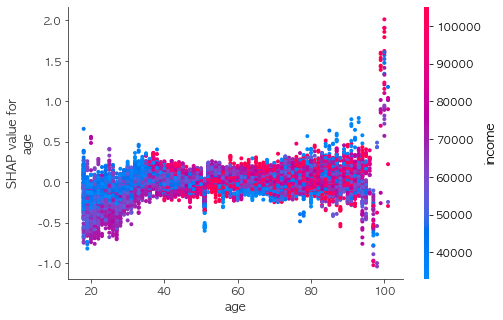

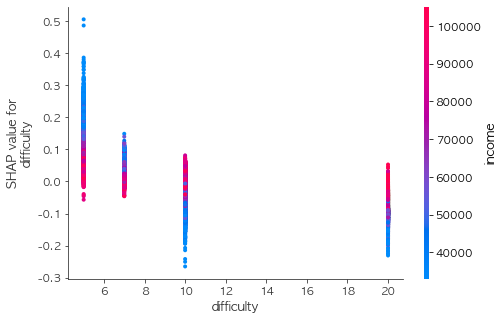

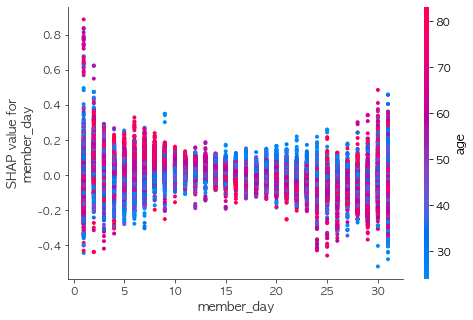

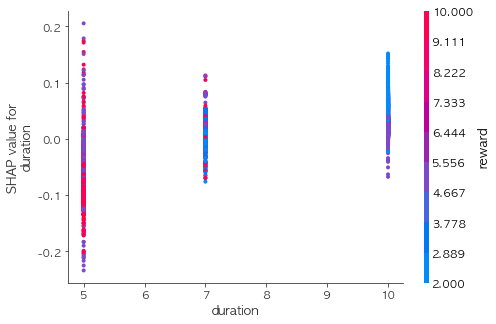

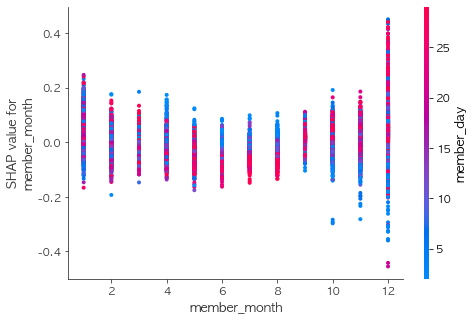

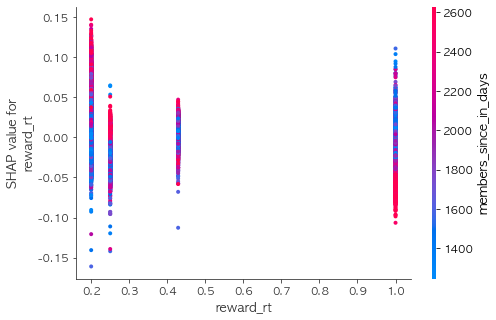

In [86]:
top_inds = np.argsort(-np.sum(np.abs(shap_values), 0))

for i in range(13):
    shap.dependence_plot(top_inds[i], shap_values, X_train_selected)